# Practical Assignment 1

# DES

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
#SBOX
S_BOX = [
         
[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
 [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
 [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
 [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
],

[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
 [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
 [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
 [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
],

[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
 [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
 [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
 [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
],

[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
 [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
 [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
 [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
],  

[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
 [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
 [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
 [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
], 

[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
 [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
 [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
 [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
], 

[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
 [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
 [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
 [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
],
   
[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
 [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
 [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
 [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
],
[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
 [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
 [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
 [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
],

[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
 [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
 [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
 [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
],

[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
 [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
 [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
 [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
],

[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
 [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
 [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
 [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
],  

[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
 [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
 [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
 [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
], 

[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
 [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
 [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
 [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
], 

[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
 [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
 [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
 [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
],
   
[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
 [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
 [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
 [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
]
]

SHIFT = [1,1,2,2,2,2,2,2,1,2,2,1,2,2,2,1,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,1]

## Generate Permutations table for different size bits

In [2]:
#for different bit sizes
SEED=459
def Initial_permutation(w):
    w=2*w
    random.seed(SEED)
    num=list(range(1,w+1))
    random.shuffle(num)
    IP=num
    return IP
def Inverse_permutation(P,w):
    w=w*2
    d=dict()
    for i in range(0,w):
         d.update({P[P[i]-1]:i+1})
    IPinv=[]
    for i in range(0,w):
        IPinv.append(d[P[i]])
    return IPinv
def permuted_choice_one(w):#it will discard every 8th bits 
    w=w*2
    random.seed(SEED)
    l=[]
    for i in range(1,w+1):
        if(i%8!=0):
            l.append(i)
    random.shuffle(l)
    pc1=l
    return pc1
def permuted_choice_two(w):
    diff=int(w*2/8)
    w=w*2-int(w*2/8)
    a=list(range(1,w+1))
    random.shuffle(a)
    a2= random.sample(range(1,w+1),diff )
    a=list(set(a)-set(a2))
    random.shuffle(a)
    #a=np.asarray(a)
    return a 
def permutation(w):
    a=list(range(1,w+1))
    random.shuffle(a)
    return a
def Expansion_Permutation(w):
    num1=list(range(1,w+1))
    e=[w,1]
    i=2
    c=0
    while(i<w):
            if(c<2):
                e.append(i)
                i=i+1
                c=c+1
            else:
                c=c+1
                e=e+[i,i+1,i,i+1]
                i=i+2
            if(c==3):
                c=0
    e=e+[w,1]
    w2=w+int(w/2)
    return e

## Functions for Des

In [3]:
def string_to_bit_array(text):#Convert a string into a list of bits
    array = list()
    for char in text:
        binval = binvalue(char, 8)#Get the char value on one byte
        array.extend([int(x) for x in list(binval)]) #Add the bits to the final list
    return array

def bit_array_to_string(array): #Recreate the string from the bit array
    res = ''.join([chr(int(y,2)) for y in [''.join([str(x) for x in _bytes]) for _bytes in  nsplit(array,8)]])   
    return res

def binvalue(val, bitsize): #Return the binary value as a string of the given size 
    binval = bin(val)[2:] if isinstance(val, int) else bin(ord(val))[2:]
    if len(binval) > bitsize:
        raise "binary value larger than the expected size"
    while len(binval) < bitsize:
        binval = "0"+binval #Add as many 0 as needed to get the wanted size
    return binval

def nsplit(s, n):#Split a list into sublists of size "n"
    return [s[k:k+n] for k in range(0, len(s), n)]

ENCRYPT=1
DECRYPT=0

class des():
    def __init__(self):
        self.password = None
        self.text = None
        self.keys = list()
    def run(self, key, text,hf_block,rounds ,action=ENCRYPT, padding=False):
        full_block=hf_block*2
        kyln=int(full_block/8)
        if len(key) < kyln:
            raise "Key Should be 8 bytes long"
        elif len(key) > kyln:
              key = key[:kyln] #If key size is above 8bytes, cut to be 8bytes long
        
        self.password = key
        self.text = text
        self.rounds=rounds
        if padding and action==ENCRYPT:
            self.addPadding()
        elif len(self.text) % int(hf_block*2/8) != 0:#If not padding specified data size must be multiple of 8 bytes
            raise "Data size should be multiple of 8"
        full_block=hf_block*2
        size=full_block-int(full_block/8)
        self.generatekeys(hf_block,rounds) #Generate all the keys
        text_blocks = nsplit(self.text,int(full_block/8)) #Split the text in blocks of 8 bytes so 64 bits
        result = list()
        for block in text_blocks:#Loop over all the blocks of data
            block = string_to_bit_array(block)#Convert the block in bit array
            block = self.permut(block,IP)#Apply the initial permutation
            g, d = nsplit(block,hf_block) #g(LEFT), d(RIGHT)
            tmp = None
            for i in range(rounds): #Do the n rounds
                d_e = self.expand(d, E) #Expand d to match Ki size (24bits/48bits/96bits)
                if action == ENCRYPT:
                    tmp = self.xor(self.keys[i], d_e)#If encrypt use Ki
                else:
                    tmp = self.xor(self.keys[(rounds-1)-i], d_e)#If decrypt start by the last key
                tmp = self.substitute(tmp) #Method that will apply the SBOXes
                tmp = self.permut(tmp, P)
                tmp = self.xor(g, tmp)
                g = d
                d = tmp
            result += self.permut(d+g,IPinv ) #Do the last permut and append the result to result
        final_res = bit_array_to_string(result)
        if padding and action==DECRYPT:
            return self.removePadding(final_res) #Remove the padding if decrypt and padding is true
        else:
            return final_res #Return the final string of data ciphered/deciphered    
    
    def substitute(self, d_e):#Substitute bytes using SBOX
        subblocks = nsplit(d_e, 6)#Split bit array into sublist of 6 bits
        result = list()
        for i in range(len(subblocks)): #For all the sublists
            block = subblocks[i]
            row = int(str(block[0])+str(block[5]),2)#Get the row with the first and last bit
            column = int(''.join([str(x) for x in block[1:][:-1]]),2) #Column is the 2,3,4,5th bits
            val = S_BOX[i][row][column] #Take the value in the SBOX appropriated for the round (i)
            bin = binvalue(val, 4)#Convert the value to binary
            result += [int(x) for x in bin]#And append it to the resulting list
        return result
    
    def permut(self, block, table):#Permut the given block using the given table (so generic method)
        return [block[x-1] for x in table]
    
    def expand(self, block, table):#Do the exact same thing than permut but for more clarity has been renamed
        return [block[x-1] for x in table]
    
    def xor(self, t1, t2):#Apply a xor and return the resulting list
        return [x^y for x,y in zip(t1,t2)]
    
    def generatekeys(self,hf_block,rounds):#Algorithm that generates all the keys
        self.keys = []
        key = string_to_bit_array(self.password)
        key = self.permut(key,PC1 ) #Apply the initial permut on the key
        full_block=hf_block*2
        size=full_block-int(full_block/8)
        g, d = nsplit(key,int(size/2) ) #Split it in to (g->LEFT),(d->RIGHT)
        for i in range(rounds):#Apply the 16 rounds
            g, d = self.shift(g, d, SHIFT[i]) #Apply the shift associated with the round (not always 1)
            tmp = g + d #Merge them
            self.keys.append(self.permut(tmp, PC2)) #Apply the permut to get the Ki

    def shift(self, g, d, n): #Shift a list of the given value
        return g[n:] + g[:n], d[n:] + d[:n]
    
    def addPadding(self):#Add padding to the datas using PKCS5 spec.
        pad_len = 8 - (len(self.text) % 8)
        self.text += pad_len * chr(pad_len)
    
    def removePadding(self, data):#Remove the padding of the plain text (it assume there is padding)
        pad_len = ord(data[-1])
        return data[:-pad_len]
    
    def encrypt(self, key, text,hf_block,rounds, padding=False):
        return self.run(key, text,hf_block,rounds, ENCRYPT, padding)
    
    def decrypt(self, key, text,hf_block,rounds, padding=False):
        return self.run(key, text,hf_block,rounds, DECRYPT, padding)

In [4]:
def calldes(key,text,hf_block,rounds):
    if hf_block==16:
        padd=True
    else:
        padd=False
    global PC2,IP,IPinv,E,P,PC1
    PC2=permuted_choice_two(hf_block) 
    IP=Initial_permutation(hf_block)
    IPinv=Inverse_permutation(IP,hf_block)
    E=Expansion_Permutation(hf_block)
    P=permutation(hf_block)
    PC1=permuted_choice_one(hf_block)
    d = des()
    ciph = d.encrypt(key,text,hf_block,rounds,padd)#padding=true for hf_block=16
    plain = d.decrypt(key,ciph,hf_block,rounds,padd)
    return ciph,plain

In [47]:
hf_block=64
rounds=16
key ="ar#4@yuo&]db>!d:8%"
text= "hey there this is assignment bye"
ciph,plain=calldes(key,text,hf_block,rounds)
print("Ciphered: "+ciph)
print("Deciphered: "+plain)

Ciphered: ÇÃ¥1¼s\¥¬ÂÞÝ1*Ä¹´N,ùårº_$WØB
Deciphered: hey there this is assignment bye


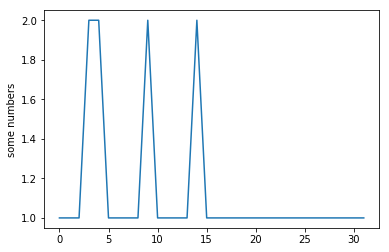

In [61]:
from collections import Counter 
res = Counter(ciph)
res2=Counter(plain)
l=[]
for i in range(len(ciph)):
    l.append(res[ciph[i]])
plt.plot(l)
plt.ylabel('some numbers')
plt.show()

In [62]:
res

Counter({'\x81': 1,
         'Ç': 1,
         'Ã': 1,
         '¥': 2,
         '1': 2,
         '¼': 1,
         '\x9d': 1,
         's': 1,
         '\\': 1,
         '¬': 1,
         'Â': 1,
         'Þ': 1,
         'Ý': 1,
         '*': 1,
         'Ä': 1,
         '¹': 1,
         '\x08': 1,
         '´': 1,
         'N': 1,
         ',': 1,
         'ù': 1,
         'å': 1,
         'r': 1,
         'º': 1,
         '_': 1,
         '$': 1,
         'W': 1,
         'Ø': 1,
         '\x9e': 1,
         'B': 1})

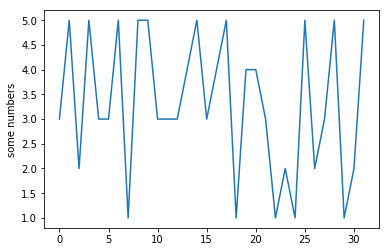

In [58]:
res2=Counter(plain)
l=[]
for i in range(len(plain)):
    l.append(res2[plain[i]])
plt.plot(l)
plt.ylabel('some numbers')
plt.show()

In [59]:
res2

Counter({'h': 3,
         'e': 5,
         'y': 2,
         ' ': 5,
         't': 3,
         'r': 1,
         'i': 3,
         's': 4,
         'a': 1,
         'g': 1,
         'n': 2,
         'm': 1,
         'b': 1})

# The avalanche effect with different hyper parameter choices

In [6]:
def calldes_change(change,hf_block,rounds):
    if hf_block==16:
        padd=True
    else:
        padd=False
    if change=='plaintext':
        key ="ar#4@yuo&]db>!d:8%"
        text= "hey there this my assignment bye"
        text2="qey there this my assignment bye"#first bit changed to q
    if change=='key':
        key ="ar#4@yuo&]db>!d:8%"
        key2="br#4@yuo&]db>!d:8%"#1st bit changes to b
        text= "hey there this my assignment bye"
    global PC2,IP,IPinv,E,P,PC1
    PC2=permuted_choice_two(hf_block) 
    IP=Initial_permutation(hf_block)
    IPinv=Inverse_permutation(IP,hf_block)
    E=Expansion_Permutation(hf_block)
    P=permutation(hf_block)
    PC1=permuted_choice_one(hf_block)
    d = des()
    rtext1 = d.encrypt(key,text,hf_block,rounds,padd)#padding=true for hf_block=16
    r2text1 = d.decrypt(key,rtext1,hf_block,rounds,padd)
    if(change=='plaintext'):
            rtext2 = d.encrypt(key,text2,hf_block,rounds,padd)#padding=true for hf_block=16
            r2text2 = d.decrypt(key,rtext2,hf_block,rounds,padd)
            return rtext1,rtext2
    if(change=='key'):
            rkey2 = d.encrypt(key2,text,hf_block,rounds,padd)#padding=true for hf_block=16
            r2key2 = d.decrypt(key2,rkey2,hf_block,rounds,padd)
            return rtext1,rkey2
##for smooth curve
def plot_effect(df,bits):
        x=df['Rounds']
        y=df['Number of bits differ']
        xnew = np.linspace(x.min(), x.max(), 500)  
        spl = make_interp_spline(x, y, k=3)  # type: BSpline
        power_smooth = spl(xnew)
        plt.xlabel("Number of Rounds")
        plt.ylabel("Number of bits differ")
        plt.title("for " +str(bits) +" bits half block")
        plt.plot(xnew,power_smooth)
        plt.show()

## Change in Plaintext

In [28]:
#setting parameters
hf_block_size=[16,32,64]
changein='plaintext'
max_rounds=32

### For 16 bits half block size

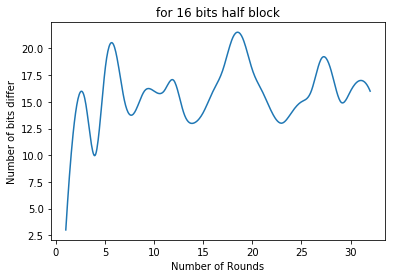

In [29]:
#16_bits
bits=hf_block_size[0]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_16=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_16_bit=pd.concat([n,l_for_16],axis=1)

#plotting
plot_effect(for_16_bit,bits)

In [30]:
for_16_bit.head(10)

,Rounds,Number of bits differ
0,1,3
1,2,14
2,3,15
3,4,10
4,5,18
5,6,20
6,7,15
7,8,14
8,9,16
9,10,16


### For 32 bits half block size

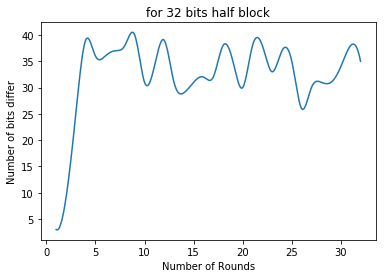

In [31]:
#32_bits
bits=hf_block_size[1]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_32=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_32_bit=pd.concat([n,l_for_32],axis=1)

#plotting
plot_effect(for_32_bit,bits)

In [32]:
for_32_bit.head(10)

,Rounds,Number of bits differ
0,1,3
1,2,9
2,3,25
3,4,39
4,5,36
5,6,36
6,7,37
7,8,38
8,9,40
9,10,31


### For 64 bits half block size

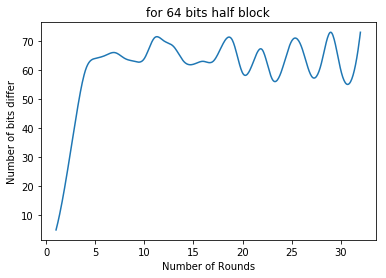

In [33]:
#64_bits
bits=hf_block_size[2]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_64=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_64_bit=pd.concat([n,l_for_64],axis=1)

#plotting
plot_effect(for_64_bit,bits)

In [34]:
for_64_bit.head(10)

,Rounds,Number of bits differ
0,1,5
1,2,22
2,3,43
3,4,60
4,5,64
5,6,65
6,7,66
7,8,64
8,9,63
9,10,64


## Change in Key

In [35]:
hf_block_size=[16,32,64]
changein='key'
max_rounds=32

### For 16 bits half block size

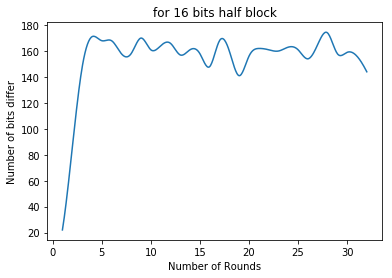

In [36]:
#16_bits
bits=hf_block_size[0]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_16=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_16_bit=pd.concat([n,l_for_16],axis=1)

#plotting
plot_effect(for_16_bit,bits)

In [37]:
for_16_bit.head(10)

,Rounds,Number of bits differ
0,1,22
1,2,85
2,3,147
3,4,171
4,5,168
5,6,168
6,7,158
7,8,158
8,9,170
9,10,161


### For 32 bits half block size

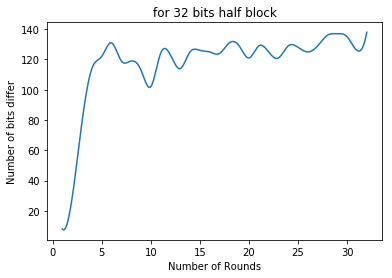

In [38]:
#32_bits
bits=hf_block_size[1]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_32=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_32_bit=pd.concat([n,l_for_32],axis=1)

#plotting
plot_effect(for_32_bit,bits)

In [39]:
for_32_bit.head(10)

,Rounds,Number of bits differ
0,1,8
1,2,29
2,3,79
3,4,114
4,5,122
5,6,131
6,7,119
7,8,119
8,9,113
9,10,102


### For 64 bits half block size

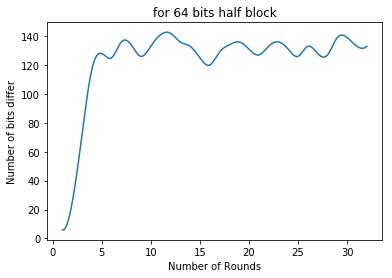

In [40]:
#64_bits
bits=hf_block_size[2]
l=[]
for i in range(1,max_rounds+1):
    q1,q2=calldes_change(changein,bits,i)
    q11=string_to_bit_array(q1)
    q22=string_to_bit_array(q2)
    c=0
    for i in range(len(q11)):
        if(q11[i]!=q22[i]):
            c=c+1
    l.append(c) 
l=np.asarray(l)
l_for_64=pd.DataFrame(l,columns=['Number of bits differ'])
n=np.asarray(list(range(1,max_rounds+1)))
n=pd.DataFrame(n,columns=['Rounds'])
for_64_bit=pd.concat([n,l_for_64],axis=1)

#plotting
plot_effect(for_64_bit,bits)

In [41]:
for_64_bit.head(10)

,Rounds,Number of bits differ
0,1,6
1,2,25
2,3,72
3,4,117
4,5,128
5,6,125
6,7,136
7,8,134
8,9,126
9,10,133


## Weak keys supplied by the user affects the round keys

In [42]:
weak_keys=['0101 0101 0101 0101','1F 1F 01 01 0E 0E 01 01 E0 01 01 E0 F1 01 01 F1']


In [43]:
def permut(block, table):#Permut the given block using the given table (so generic method)
        return [block[x-1] for x in table]
def shift(g, d, n): #Shift a list of the given value
        return g[n:] + g[:n], d[n:] + d[:n]
def nsplit(s, n):#Split a list into sublists of size "n"
    return [s[k:k+n] for k in range(0, len(s), n)]
    
def generatekeys_from_weakkeys(key,hf_block,rounds):#Algorithm that generates all the keys
        full_block=hf_block*2
        kyln=int(full_block/8)
        if len(key) < kyln:
            raise "Key Should be 8 bytes long"
        elif len(key) > kyln:
              key = key[:kyln] #If key size is above 8bytes, cut to be 8bytes long
        
        password = key
        keys = []
        key = string_to_bit_array(password)
        PC1=permuted_choice_one(hf_block)
        PC2=permuted_choice_two(hf_block) 
        key = permut(key,PC1 ) #Apply the initial permut on the key
        full_block=hf_block*2
        size=full_block-int(full_block/8)
        g, d = nsplit(key,int(size/2) ) #Split it in to (g->LEFT),(d->RIGHT)
        for i in range(rounds):#Apply the 16 rounds
            g, d = shift(g, d, SHIFT[i]) #Apply the shift associated with the round (not always 1)
            tmp = g + d #Merge them
            k=permut(tmp, PC2)
            keys.append(k)
            k=[str(i) for i in k]
            k="".join(k)
            #k=nsplit(k,8)
            print("----------------------------------------------------------------------------------------------------------")
            print("Round"+str(i+1))
            print(k)
            #print("---------------------------------------------------------------------------------------------------------")
              #Apply the permut to get the Ki
    

In [44]:
for i in [16,32,64]:
        print("for "+str(i)+" half block bits")
        generatekeys_from_weakkeys(weak_keys[0],i,16)
        print("**************************************************************************************************************")
        print("**************************************************************************************************************")

for 16 half block bits
----------------------------------------------------------------------------------------------------------
Round1
000100000011011000100000
----------------------------------------------------------------------------------------------------------
Round2
100000000000110100001000
----------------------------------------------------------------------------------------------------------
Round3
100010010101000010001001
----------------------------------------------------------------------------------------------------------
Round4
000001010001100101000000
----------------------------------------------------------------------------------------------------------
Round5
000010001100000001001011
----------------------------------------------------------------------------------------------------------
Round6
010001010010100000000011
----------------------------------------------------------------------------------------------------------
Round7
010000001100100000001100
----

## GUI code

In [46]:
import string
import tkinter as tk
from tkinter import ttk # a advanced module for better
import tkinter.font as font
window=tk.Tk()

window.title("Data Encryption Standard")
#CREATING LABELS
label2=ttk.Label(window,text='Data Encryption Standard',font=25)
#label2.grid(row=0,column=0,sticky=tk.W)
label2.pack()
myfont=font.Font(weight='bold')
label2['font']=myfont


#CREATING ENTRY BOXES
#for encrypt
#for plaintext or ciphertext
label3=ttk.Label(window,text='Enter your plaintext(must be multiple of 8)',font=20)
label3.pack()
label3.place(y=200,x=20)
text=tk.StringVar()
entry_plain=ttk.Entry(window,width=70,textvariable=text)
entry_plain.pack()
entry_plain.place( height=50, width=1500,y=220,x=20)
#for key
#for encrypt
label4=ttk.Label(window,text='Enter your key(must be greater than 16 char)',font=20)
label4.pack()
label4.place(y=50,x=20)
key=tk.StringVar()
entry_plain=ttk.Entry(window,width=70,textvariable=key)
entry_plain.pack()
entry_plain.place( height=50, width=1500,y=70,x=20)

#radio button
label5=ttk.Label(window,text='Select half block size',font=20)
label5.pack()
label5.place(y=330,x=20)
bits = tk.IntVar()
rad1=ttk.Radiobutton(window,text='16 bits',variable=bits,value=16)
rad2=ttk.Radiobutton(window,text='32 bits',variable=bits,value=32)
rad3=ttk.Radiobutton(window,text='64 bits',variable=bits,value=64)
rad1.pack()
rad1.place(y=350,x=30)
rad2.pack()
rad2.place(y=380,x=30)
rad3.pack()
rad3.place(y=410,x=30)

#spin box for number of rounds
label6=ttk.Label(window,text='Number of Rounds',font=20)
label6.pack()
label6.place(y=330,x=700)
rounds = tk.IntVar()
rrad1=ttk.Radiobutton(window,text='1',variable=rounds,value=1)
rrad2=ttk.Radiobutton(window,text='8',variable=rounds,value=8)
rrad3=ttk.Radiobutton(window,text='16',variable=rounds,value=16)
rrad4=ttk.Radiobutton(window,text='32',variable=rounds,value=32)
rrad1.pack()
rrad1.place(y=350,x=700)
rrad2.pack()
rrad2.place(y=370,x=700)
rrad3.pack()
rrad3.place(y=390,x=700)
rrad4.pack()
rrad4.place(y=410,x=700)

#output box
label=ttk.Label(window,text='Answer',font=20)
label.pack()
label.place(y=500,x=20)
answer=ttk.Entry(window,width=70,font=10)
answer.pack()
answer.place( height=100, width=1200,y=530,x=20)
#create function
def ency_fun():
        cip,enc=calldes(key.get(),text.get(),bits.get(),rounds.get())
        global enlb
        cip="Ciphered : "+cip
        enc="Deciphered : "+enc
        l=cip+"          "+enc
        answer.delete(0,tk.END)
        answer.insert(tk.END,l)
#create button
ency_button=tk.Button(window,text='RUN DES',command=ency_fun,bg='black',fg='white',font=10)
#deci_button=tk.Button(window,text='Decipher',command=deci_fun,bg='red',fg='white',font=10)
ency_button.pack()
ency_button.place(y=440,x=20)
#deci_button.pack()
#deci_button.place(y=440,x=800)

window.mainloop()